## **CNN with CIFAR-10 Data**

In [99]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [100]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [101]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [102]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [103]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

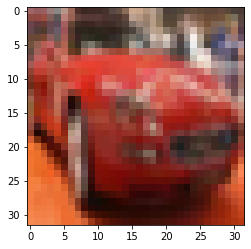

In [104]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [105]:
y_train[5]

array([1], dtype=uint8)

In [106]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

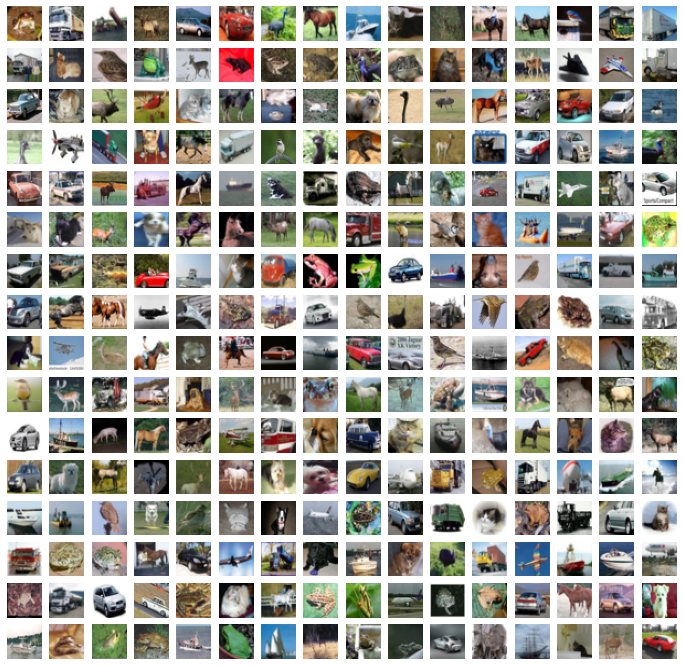

In [107]:
plt.figure(figsize= (12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [108]:
classes[6]

'frog'

## Data Preprocessing

In [109]:
X_train[5].min()

0

In [110]:
X_train[5].max()

252

In [111]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [112]:
X_train[5].min()

0.0

In [113]:
X_train[5].max()

0.9882353

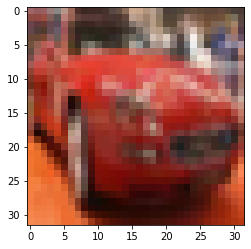

In [114]:
plt.imshow(X_train[5])

In [115]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [116]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [117]:
from tensorflow.keras.utils import to_categorical

In [118]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [120]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [124]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5082 - accuracy: 0.4538 - val_loss: 1.3253 - val_accuracy: 0.5269
Epoch 2/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1855 - accuracy: 0.5780 - val_loss: 1.1171 - val_accuracy: 0.6063
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0319 - accuracy: 0.6365 - val_loss: 1.0697 - val_accuracy: 0.6198
Epoch 4/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9282 - accuracy: 0.6761 - val_loss: 1.0812 - val_accuracy: 0.6314
Epoch 5/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8434 - accuracy: 0.7039 - val_loss: 0.9783 - val_accuracy: 0.6646
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7686 - accuracy: 0.7315 - val_loss: 1.0015 - val_accuracy: 0.6653
Epoch 7/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7029 - accuracy: 0.7540 - val_loss: 1.0456 -

In [125]:
model.metrics_names

['loss', 'accuracy']

In [126]:
model.history.history

{'accuracy': [0.4537599980831146,
  0.5779799818992615,
  0.63646000623703,
  0.6761199831962585,
  0.7039399743080139,
  0.7314599752426147,
  0.7540000081062317],
 'loss': [1.5081857442855835,
  1.1855138540267944,
  1.0319437980651855,
  0.9282347559928894,
  0.8434427976608276,
  0.7685574889183044,
  0.7028801441192627],
 'val_accuracy': [0.5268999934196472,
  0.6062999963760376,
  0.6197999715805054,
  0.6313999891281128,
  0.6646000146865845,
  0.6653000116348267,
  0.6538000106811523],
 'val_loss': [1.325264573097229,
  1.1170718669891357,
  1.0697282552719116,
  1.0812467336654663,
  0.9782548546791077,
  1.0015100240707397,
  1.0455676317214966]}

In [127]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.508186,0.45376,1.325265,0.5269
1,1.185514,0.57798,1.117072,0.6063
2,1.031944,0.63646,1.069728,0.6198
3,0.928235,0.67612,1.081247,0.6314
4,0.843443,0.70394,0.978255,0.6646


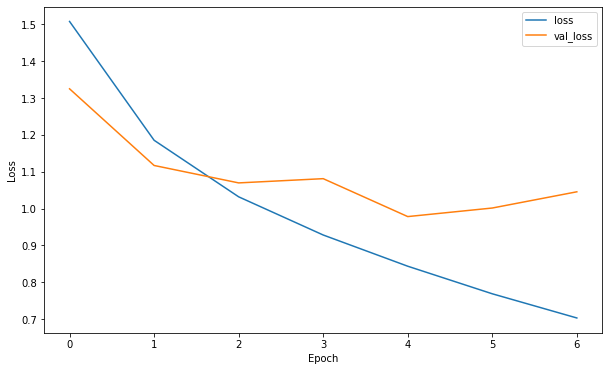

In [128]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

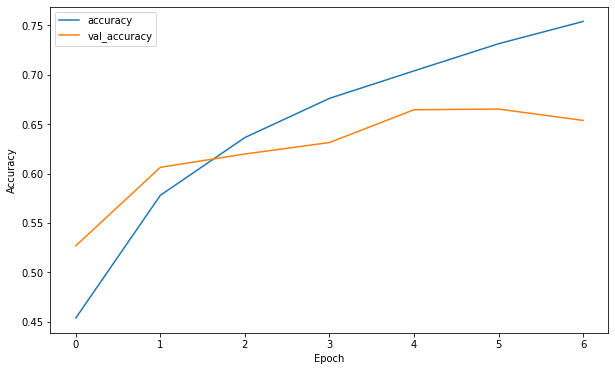

In [129]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [130]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 3s 9ms/step - loss: 1.0456 - accuracy: 0.6538
[1.0455676317214966, 0.6538000106811523]


In [131]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [132]:
preds = model.predict(X_test)


In [133]:
predictions= np.argmax(preds, axis=1)

In [134]:
predictions

array([5, 1, 8, ..., 5, 1, 7])

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67      1000
           1       0.68      0.86      0.76      1000
           2       0.59      0.53      0.56      1000
           3       0.47      0.49      0.48      1000
           4       0.73      0.45      0.56      1000
           5       0.62      0.48      0.54      1000
           6       0.76      0.72      0.74      1000
           7       0.71      0.70      0.71      1000
           8       0.78      0.73      0.75      1000
           9       0.69      0.76      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [136]:
print(confusion_matrix(y_test, predictions))

[[810  48  21  11   5   1   4   4  59  37]
 [ 28 861   2   4   1   3   7   1  19  74]
 [140  26 534  76  37  57  49  32  23  26]
 [ 65  37  61 494  34 140  58  40  29  42]
 [ 79  17 131  96 449  28  65 108  13  14]
 [ 37  21  71 218  26 485  24  75  18  25]
 [ 25  33  52  80  24  17 717  16  11  25]
 [ 51  23  28  47  36  44   8 702   5  56]
 [143  63   3   7   0   2   2   3 731  46]
 [ 53 132   6   7   2   3   4   7  31 755]]


In [137]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0455676317214966
Test accuracy: 0.6538000106811523


In [160]:
my_image = X_test[44]

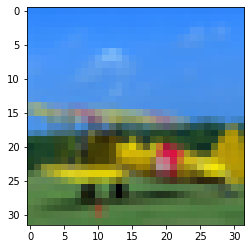

In [161]:
plt.imshow(my_image)

In [162]:
image_prediction=model.predict(my_image.reshape(1,32,32,3))

In [163]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(image_prediction, axis=1)

array([0])

In [164]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'airplane'

In [145]:
#model.save("cnn-1.h5")

In [146]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D((2,2)))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
        
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [147]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 128)       

In [148]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test))

Epoch 1/30
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5279 - accuracy: 0.4410 - val_loss: 1.2607 - val_accuracy: 0.5447
Epoch 2/30
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2019 - accuracy: 0.5707 - val_loss: 1.1245 - val_accuracy: 0.5965
Epoch 3/30
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0663 - accuracy: 0.6211 - val_loss: 0.9701 - val_accuracy: 0.6585
Epoch 4/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9812 - accuracy: 0.6512 - val_loss: 0.9001 - val_accuracy: 0.6877
Epoch 5/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9192 - accuracy: 0.6759 - val_loss: 0.8639 - val_accuracy: 0.7024
Epoch 6/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8740 - accuracy: 0.6898 - val_loss: 0.8095 - val_accuracy: 0.7198
Epoch 7/30
1563/1563 [==============================] - 70s 44ms/step - loss: 0.8357 - accuracy: 0.7041 - val_loss: 0.8210 -

In [149]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7100218534469604
Test accuracy: 0.7623999714851379


In [150]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1000
           1       0.94      0.81      0.87      1000
           2       0.71      0.63      0.66      1000
           3       0.59      0.53      0.56      1000
           4       0.71      0.79      0.75      1000
           5       0.63      0.69      0.66      1000
           6       0.81      0.83      0.82      1000
           7       0.82      0.77      0.80      1000
           8       0.86      0.86      0.86      1000
           9       0.81      0.87      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [152]:
print(confusion_matrix(y_test, predictions))

[[843   7  19  12  11   5  11   9  52  31]
 [ 19 812   9   9   2  10  13   3  29  94]
 [ 74   1 628  59  76  63  59  22   9   9]
 [ 35   2  55 532  64 210  47  31   8  16]
 [ 19   0  40  49 791  31  31  30   6   3]
 [  9   1  45 131  54 691  20  43   0   6]
 [  5   2  36  52  39  18 830  13   4   1]
 [ 14   0  37  37  68  53   4 773   5   9]
 [ 59  13  11   5  11   4   6   6 856  29]
 [ 24  29  10  14   3   4   8  14  26 868]]


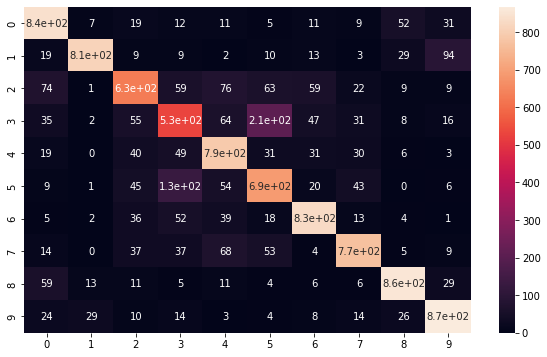

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
model.save("cnn-1.h5")